
**Pre processing Steps**
1. Load the dataset
2. Check for null values
3. See if the dataset is balanced or not
4. Check for any duplicate rows
5. Remove the duplicate rows

**Importing Required Libraries**
1) Pandas 2)Numpy 3) Matplotlip 4)Seaborn 5)Warning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

**1. Loading the file from pc to work on Dataset**

In [2]:
haberman = pd.read_csv('E:/Data Science/[FCO] AppliedAICourse - Applied Machine Learning Course/9.16 - Exercise Perform EDA on Haberman dataset/haberman.csv')
print(haberman.shape)

(306, 4)


There are 306 Rows and 4 Colmns in Habermans Dataset

**2. Checking for NULL VALUES in the Dataset**

In [3]:
haberman.isnull().values.any()

False

Habermans Dataset has NO MISSING VALUES

**3. Checking if the dataset is Balanced or unbalanced**

In [4]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

The dataset is UNBALANCED.....

**4. Checking for DUPLICATE ROWS or DATA in Dataset**

In [5]:
haberman.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
301    False
302    False
303    False
304    False
305    False
Length: 306, dtype: bool

**5. Remove DUPLICATE Rows**

In [6]:
haberman = haberman.drop_duplicates()
haberman.shape

(289, 4)


**Understanding the dataset**
1. Retrieve the column name and understand the meaning of each column.
2. Understand the end goal.
3. Seek background knowledge if required.
4. Try to find out if it is a Classification task or a Regression task.
5. Haberman dataset has data points from a study that was conducted from 1958 to 1970 on survival rate of the patients who had undergone surgery for breast cancer.

:

age: This tells us the age of the patient at the time of operation.

year: This tells us the year in which patient had an operation.

nodes: They are also known as Auxiliary lymph nodes whose function is to filter fluids before they are eventually released into the bloodstream. Having cancer cells in Nodes tells us that the cancer might have spread to other parts of body as well.

status: Label Feature has value of 1,2 where 2 corresponds to the patient who survived for less than 5 years and 1 corresponds to patient who survived more than 5 years post operation.

**Summary of Dataset**

In [7]:
haberman.describe()

,age,year,nodes,status
count,289.000000,289.000000,289.000000,289.000000
mean,52.422145,62.906574,4.221453,1.273356
std,10.876915,3.275794,7.325239,0.446455
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,5.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000



This way we can understand all the statistical details about the dataset like max, min, mean, std-dev, count, percentiles.

In [8]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     289 non-null    int64
 1   year    289 non-null    int64
 2   nodes   289 non-null    int64
 3   status  289 non-null    int64
dtypes: int64(4)
memory usage: 11.3 KB


**Find Out the number of columns in dataset**

In [9]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [10]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Distribution of classes in the dataset**

In [11]:
haberman['status'].value_counts()

1    210
2     79
Name: status, dtype: int64


**Distribution of class labels as percentages**

In [12]:
haberman['status'].value_counts(1)

1    0.726644
2    0.273356
Name: status, dtype: float64

This information shows that approx. 72.6% of people survived more than 5 years and 27.3% of people died within 5 years

**The 'status' column is an integer value that needs to be converted into categorical values like "Survived more than 5 years" and "Survived less than 5 years". These categorical values gives us better understanding about the dataset.**

In [13]:
haberman['status'].replace({1 : 'Survived more than 5 years',2 : 'Survived less than 5 years'}) #using REPLACE and Dictionary

0      Survived more than 5 years
1      Survived more than 5 years
2      Survived more than 5 years
3      Survived more than 5 years
4      Survived more than 5 years
                  ...            
301    Survived more than 5 years
302    Survived more than 5 years
303    Survived more than 5 years
304    Survived less than 5 years
305    Survived less than 5 years
Name: status, Length: 289, dtype: object

In [14]:
haberman.loc[haberman['status'] == 1, 'status'] = "Survived more than 5 years"
haberman.loc[haberman['status'] == 2, 'status'] = "Survived less than 5 years"
haberman

,age,year,nodes,status
0,30,64,1,Survived more than 5 years
1,30,62,3,Survived more than 5 years
2,30,65,0,Survived more than 5 years
3,31,59,2,Survived more than 5 years
4,31,65,4,Survived more than 5 years
...,...,...,...,...
301,75,62,1,Survived more than 5 years
302,76,67,0,Survived more than 5 years
303,77,65,3,Survived more than 5 years
304,78,65,1,Survived less than 5 years



**Rename the column names of the dataset**

In [15]:
haberman  = haberman.rename(columns = {'age': 'Age', 'year': 'Year', 'nodes': 'Auxiliary_Lymph_Nodes', 'status': 'Survival_Status'})
haberman

,Age,Year,Auxiliary_Lymph_Nodes,Survival_Status
0,30,64,1,Survived more than 5 years
1,30,62,3,Survived more than 5 years
2,30,65,0,Survived more than 5 years
3,31,59,2,Survived more than 5 years
4,31,65,4,Survived more than 5 years
...,...,...,...,...
301,75,62,1,Survived more than 5 years
302,76,67,0,Survived more than 5 years
303,77,65,3,Survived more than 5 years
304,78,65,1,Survived less than 5 years


**Exploratory Data Analysis**
1. Univariate analysis - PDF, CDF, Boxplot, ViolinPlot
2. Bivariate Analysis - Pair Plot, Scatter Plot
3. Multivariate Analysis - Contours

**2D Scatter Plots**

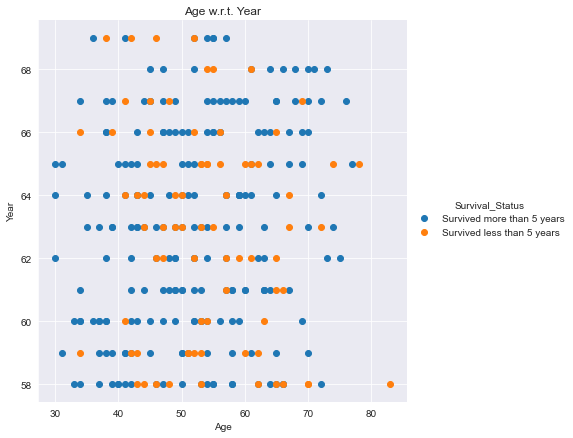

In [16]:
#1. Age vs. Year
sns.set_style('darkgrid');
sns.FacetGrid(haberman, hue = 'Survival_Status', height = 6) \
    .map(plt.scatter, "Age","Year")  \
    .add_legend();
plt.title("Age w.r.t. Year")
plt.show();

This data shows that there are higher number of people surviving for more than 5 years in the AGE group between 30 to 40

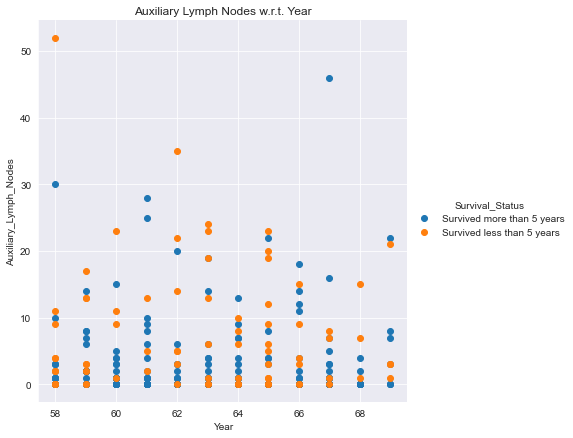

In [17]:
#Year vs. Auxiliary_Lymph_Nodes
sns.set_style('darkgrid');
sns.FacetGrid(haberman, hue = 'Survival_Status', height = 6) \
    .map(plt.scatter, "Year","Auxiliary_Lymph_Nodes")  \
    .add_legend();
plt.title("Auxiliary Lymph Nodes w.r.t. Year")
plt.show();

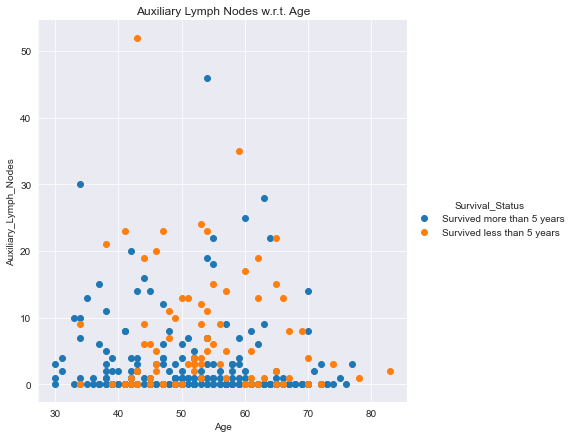

In [18]:
#3. Age vs. Auxiliary_Lymph_Nodes
sns.set_style('darkgrid');
sns.FacetGrid(haberman, hue = 'Survival_Status', height = 6) \
    .map(plt.scatter, "Age","Auxiliary_Lymph_Nodes")  \
    .add_legend();
plt.title("Auxiliary Lymph Nodes w.r.t. Age")
plt.show();

It shows maximum number of patients have less than 10 nodes.
The age group of 40 to 60 are affected more to cancer than other age.

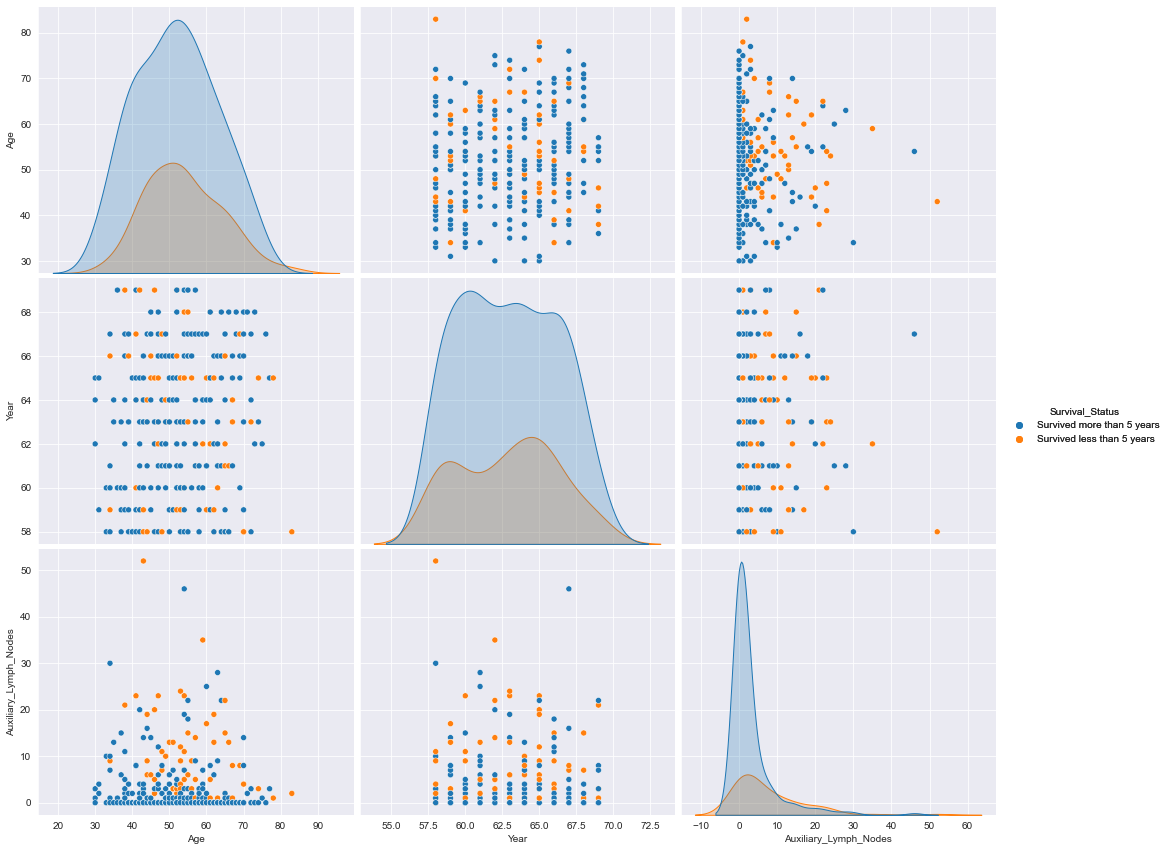

In [19]:
sns.set_style('darkgrid');
sns.pairplot(haberman,hue='Survival_Status', height = 4).add_legend()
plt.show()

From this 2D Scatter plot we are unable to classify insights, just that surviving rate is more than dying rate.

**1D Scatter Plot**

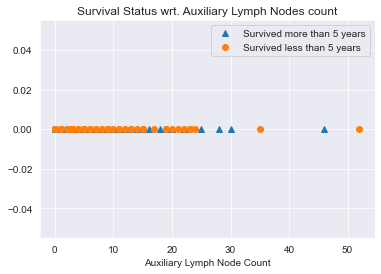

In [20]:
import numpy as np

survived_longer = haberman.loc[haberman["Survival_Status"] == "Survived more than 5 years"]
survived_less = haberman.loc[haberman["Survival_Status"] == "Survived less than 5 years"]

plt.plot(survived_longer["Auxiliary_Lymph_Nodes"],np.zeros_like(survived_longer["Auxiliary_Lymph_Nodes"]),'^')

plt.plot(survived_less["Auxiliary_Lymph_Nodes"],np.zeros_like(survived_less["Auxiliary_Lymph_Nodes"]),'o')

plt.xlabel('Auxiliary Lymph Node Count')

plt.legend(["Survived more than 5 years","Survived less than 5 years"])

plt.title('Survival Status wrt. Auxiliary Lymph Nodes count')

plt.show()

1D Scatter Plot is overlapping too much, that is why going for Histogram

**Plotting Histogram**

C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


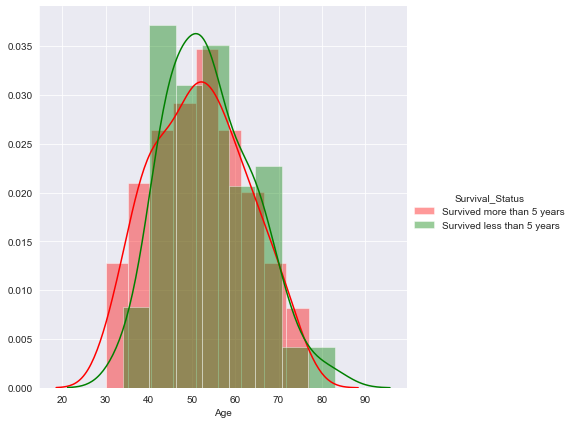

In [21]:
# PDF and Histogram w.r.t 'Age'
sns.FacetGrid(haberman, hue="Survival_Status", height = 6, palette=['r','g']) \
    .map(sns.distplot, "Age") \
    .add_legend()
plt.show()
    

By this plot we got insight that survival rate of Age between 30 to 42 is much as we can clearly see the red line is above the green. Further more we could see the Age between 42-62 has higher chances of dying. From Age 62-72 there is no as such strong discrimination of insight between life and death both are more or less the same. After the age group of 72 there is no such survival chances.

C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


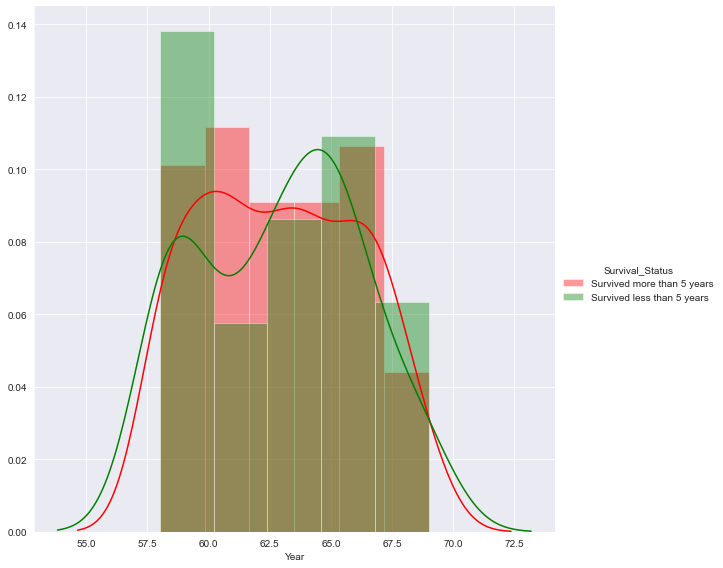

In [22]:
# PDF and Histogram w.r.t 'Year'
sns.FacetGrid(haberman, hue="Survival_Status", height = 8, palette=['r','g']) \
    .map(sns.distplot, "Year") \
    .add_legend()
plt.show()

1. Between the year 1960 to 1962 there are more people who survived for more than 5 Years.
2. There are maximum number of death rates in year between 1962-1967.

C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


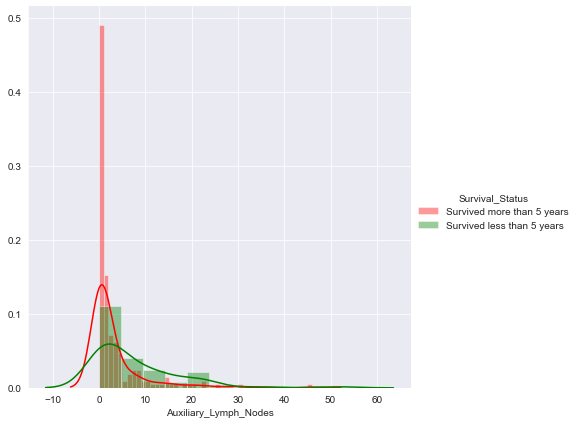

In [23]:
# PDF and Histogram w.r.t 'Auxiliary_Lymph_Nodes'
sns.FacetGrid(haberman, hue="Survival_Status", height = 6, palette=['r','g']) \
    .map(sns.distplot, "Auxiliary_Lymph_Nodes",kde = True) \
    .add_legend()
plt.show()

1. The survival rate of a patient increase when there are less number Nodes.
2. The number of nodes where patient is tend to survive more is less than 5.
3. It means there are more chances of a patient to die if number of nodes are more than 5.                                      
From the above all plots we got to know that the main Feature is Auxiliary Nodes for the survival of a patient.

**Plotting the CDF**

In [24]:
#we need to make two different data set for survived and deceased.
haberman_Surv = haberman.loc[haberman["Survival_Status"] == 'Survived more than 5 years']
haberman_Dec = haberman.loc[haberman["Survival_Status"] == 'Survived less than 5 years']

[0.71428571 0.10952381 0.02857143 0.05714286 0.01428571 0.00952381
 0.02380952 0.0047619  0.00952381 0.00952381 0.0047619  0.
 0.0047619  0.0047619  0.         0.         0.         0.
 0.         0.0047619 ]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39240506 0.17721519 0.06329114 0.08860759 0.03797468 0.08860759
 0.01265823 0.03797468 0.06329114 0.01265823 0.         0.
 0.         0.01265823 0.         0.         0.         0.
 0.         0.01265823]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


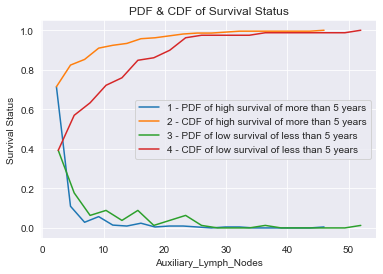

In [25]:
import numpy as np
# Plot for survivours
counts, bin_edges = np.histogram(haberman_Surv['Auxiliary_Lymph_Nodes'], bins = 20,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#plot for deceased
counts, bin_edges = np.histogram(haberman_Dec['Auxiliary_Lymph_Nodes'], bins = 20,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel("Auxiliary_Lymph_Nodes")
plt.ylabel("Survival Status")
plt.title('PDF & CDF of Survival Status')

plt.legend(["1 - PDF of high survival of more than 5 years",\
            "2 - CDF of high survival of more than 5 years",\
            "3 - PDF of low survival of less than 5 years",\
            "4 - CDF of low survival of less than 5 years"])
plt.show()



1. The people having nodes less than 3 have more than 70% chance of surviving.
2. Patient Having Nodes more than 30 have 100% chance of dying.
3. 38% patient having less than 5 nodes have less chances of survival of 5 years

**Mean and Standard Deviation** 

In [26]:
# Mean
print("The mean of number of nodes who survived more than 5 Years is : {}".format(np.mean(haberman_Surv.Auxiliary_Lymph_Nodes)))
print("The mean of number of nodes who survived less than 5 Years is : {}".format(np.mean(haberman_Dec.Auxiliary_Lymph_Nodes)))
# Std. Dev.
print("The Std. Dev. of number of nodes who survived more than 5 Years is : {}".format(np.std(haberman_Surv.Auxiliary_Lymph_Nodes)))
print("The Std. Dev. of number of nodes who survived less than 5 Years is : {}".format(np.std(haberman_Dec.Auxiliary_Lymph_Nodes)))

The mean of number of nodes who survived more than 5 Years is : 2.9857142857142858
The mean of number of nodes who survived less than 5 Years is : 7.506329113924051
The Std. Dev. of number of nodes who survived more than 5 Years is : 6.015439319291787
The Std. Dev. of number of nodes who survived less than 5 Years is : 9.196688200997547


1. The spread of data in number of people who survived more than 5 years is less than the number of people who survived less than 5 years
2. The mean of number of nodes for people who survived more than 5 years is 2.98(<3) on the other hand the mean of number of nodes for people who survived 7.5(>7) than 5 years is high.

**Median**

In [27]:
print("The median of number of nodes who survived more than 5 Years is : {}".format(np.median(haberman_Surv.Auxiliary_Lymph_Nodes)))
print("The median of number of nodes who survived less than 5 Years is : {}".format(np.median(haberman_Dec.Auxiliary_Lymph_Nodes)))

The median of number of nodes who survived more than 5 Years is : 1.0
The median of number of nodes who survived less than 5 Years is : 4.0


The median of patient surviving more is 1 and surviving less is 4

**Percentiles and Quantiles**

In [28]:
print(np.percentile(haberman_Surv["Auxiliary_Lymph_Nodes"],np.arange(0,125,25)))
print(np.percentile(haberman_Dec["Auxiliary_Lymph_Nodes"],np.arange(0,125,25)))
print(np.percentile(haberman_Surv.Auxiliary_Lymph_Nodes,90))
print(np.percentile(haberman_Dec.Auxiliary_Lymph_Nodes,90))

[ 0.  0.  1.  3. 46.]
[ 0.   1.   4.  11.5 52. ]
8.099999999999994
20.200000000000003


1. More than 50% of people surviving more than 5 years has 1 node and 75% patients have 3 nodes.
2. Patients having more than 46 nodes can also survive but chances are as low as 25%.
3. Even Patients having 1 node have died within short period but only 25% of them.
4. 50% patients have died by having 4 nodes within 5 years.
5. 75% patients have died having nodes more than 11.5 within 5 years.
6. Other remaining 25% have nodes more than 52 which died within 5 years.

**Box Plots**

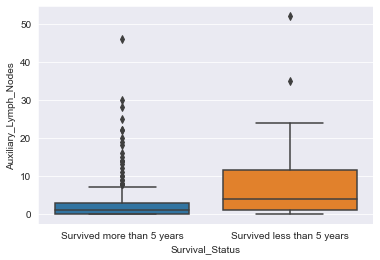

In [29]:
sns.boxplot(x="Survival_Status", y = "Auxiliary_Lymph_Nodes", data=haberman)
plt.show()

1. Threshold for survival more than 5 years is 0 to 8 nodes.
2. Threshold for survival less than 5 years is 0 to 25 nodes.

**Violin Plots**

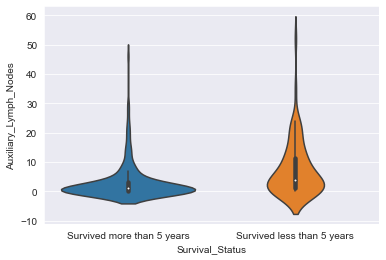

In [30]:
sns.violinplot(x="Survival_Status", y = "Auxiliary_Lymph_Nodes", data=haberman)
plt.show()


1. The spread of points in long survival is more near 0 and that of low survival is more near 2.
2. The whiskers of long survival extend from 0 to 7 and that of low survival extend from 0 to 25.